<a href="https://colab.research.google.com/github/WKR01/Projekt-PUM/blob/main/etap4incomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white (2).csv


In [ ]:
!pip install shap

In [81]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=99eac392e557e2b738d559b89b0847e86f4434cf98d082b32a1667fa7d5e45eb
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [39]:
import pandas as pd
df = pd.read_csv("winequality-white.csv")
df.head()

,fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [40]:
df.shape

(4898, 1)

In [41]:
df.columns

Index(['fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality'], dtype='object')

In [42]:
df.dtypes

fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality    object
dtype: object

In [43]:

df[['Fixed_Acidity', 'Volatile_Acidity', 'Citric_Acid', 'Residual_Sugar', 'Chlorides',
    'Free_Sulfur_Dioxide', 'Total_Sulfur_Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']] = df['fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality'].str.split(';', expand=True)


df.drop('fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality', axis=1, inplace=True)


In [44]:
all_columns = ['Fixed_Acidity', 'Volatile_Acidity', 'Citric_Acid', 'Residual_Sugar', 'Chlorides', 'Free_Sulfur_Dioxide', 'Total_Sulfur_Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']
for column in all_columns:
    df[column] = df[column].str.strip('-_')

In [45]:
columns_to_float = ['Fixed_Acidity', 'Volatile_Acidity', 'Citric_Acid', 'Residual_Sugar', 'Chlorides',
    'Free_Sulfur_Dioxide', 'Total_Sulfur_Dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']
for column in columns_to_float:
  df[column] = pd.to_numeric(df[column], errors='coerce').astype('float64')

In [46]:
df['Quality'] = pd.to_numeric(df["Quality"], errors='coerce').astype('int64')

In [47]:
df.dtypes

Fixed_Acidity           float64
Volatile_Acidity        float64
Citric_Acid             float64
Residual_Sugar          float64
Chlorides               float64
Free_Sulfur_Dioxide     float64
Total_Sulfur_Dioxide    float64
Density                 float64
pH                      float64
Sulphates               float64
Alcohol                 float64
Quality                   int64
dtype: object

In [48]:
df.head(568)

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
563,7.4,0.30,0.22,1.4,0.046,16.0,135.0,0.9928,3.08,0.77,10.4,7
564,6.8,0.51,0.30,4.2,0.066,38.0,165.0,0.9945,3.20,0.42,9.1,5
565,7.8,0.22,0.38,10.3,0.059,28.0,99.0,0.9967,3.12,0.47,10.0,6
566,7.2,0.35,0.34,12.4,0.051,6.0,37.0,0.9944,3.13,0.39,11.5,6


In [49]:
if_null = df.isnull().any()
print(if_null)

Fixed_Acidity           False
Volatile_Acidity        False
Citric_Acid             False
Residual_Sugar          False
Chlorides                True
Free_Sulfur_Dioxide     False
Total_Sulfur_Dioxide    False
Density                 False
pH                      False
Sulphates               False
Alcohol                  True
Quality                 False
dtype: bool


In [50]:
for column in df.columns:
  most_common_value = df[column].value_counts().idxmax()
  print(f"Most common value in column '{column}': {most_common_value}")
  max_value = df[column].max()
  print(f"Max value in column '{column}': {max_value}")


Most common value in column 'Fixed_Acidity': 6.8
Max value in column 'Fixed_Acidity': 14.2
Most common value in column 'Volatile_Acidity': 0.28
Max value in column 'Volatile_Acidity': 1.1
Most common value in column 'Citric_Acid': 0.3
Max value in column 'Citric_Acid': 1.66
Most common value in column 'Residual_Sugar': 1.2
Max value in column 'Residual_Sugar': 65.8
Most common value in column 'Chlorides': 0.044
Max value in column 'Chlorides': 0.346
Most common value in column 'Free_Sulfur_Dioxide': 29.0
Max value in column 'Free_Sulfur_Dioxide': 289.0
Most common value in column 'Total_Sulfur_Dioxide': 111.0
Max value in column 'Total_Sulfur_Dioxide': 440.0
Most common value in column 'Density': 0.992
Max value in column 'Density': 1.03898
Most common value in column 'pH': 3.14
Max value in column 'pH': 3.82
Most common value in column 'Sulphates': 0.5
Max value in column 'Sulphates': 1.08
Most common value in column 'Alcohol': 9.4
Max value in column 'Alcohol': 1000.0
Most common val

In [51]:
df["Chlorides"] = df["Chlorides"].fillna(df["Chlorides"].value_counts().idxmax())
df["Alcohol"] = df["Alcohol"].fillna(df["Alcohol"].value_counts().idxmax())

In [52]:
for column in df.columns:
  negative_values_exist = (df[column] < 0).any()

if negative_values_exist:
    print("There are negative values in columns")
else:
    print("There are no negative values in columns")

There are no negative values in columns


In [53]:
df.shape

(4898, 12)

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
Q1 = df.drop("Quality", axis=1).quantile(0.25)
Q3 = df.drop("Quality", axis=1).quantile(0.75)
IQR = Q3 - Q1

for column in df.drop("Quality", axis=1).columns:
    df = df.drop(df.loc[(df[column] > (Q3[column] + 1.5 * IQR[column])) |
                        (df[column] < (Q1[column] - 1.5 * IQR[column]))].index, axis=0)

<function matplotlib.pyplot.show(close=None, block=None)>

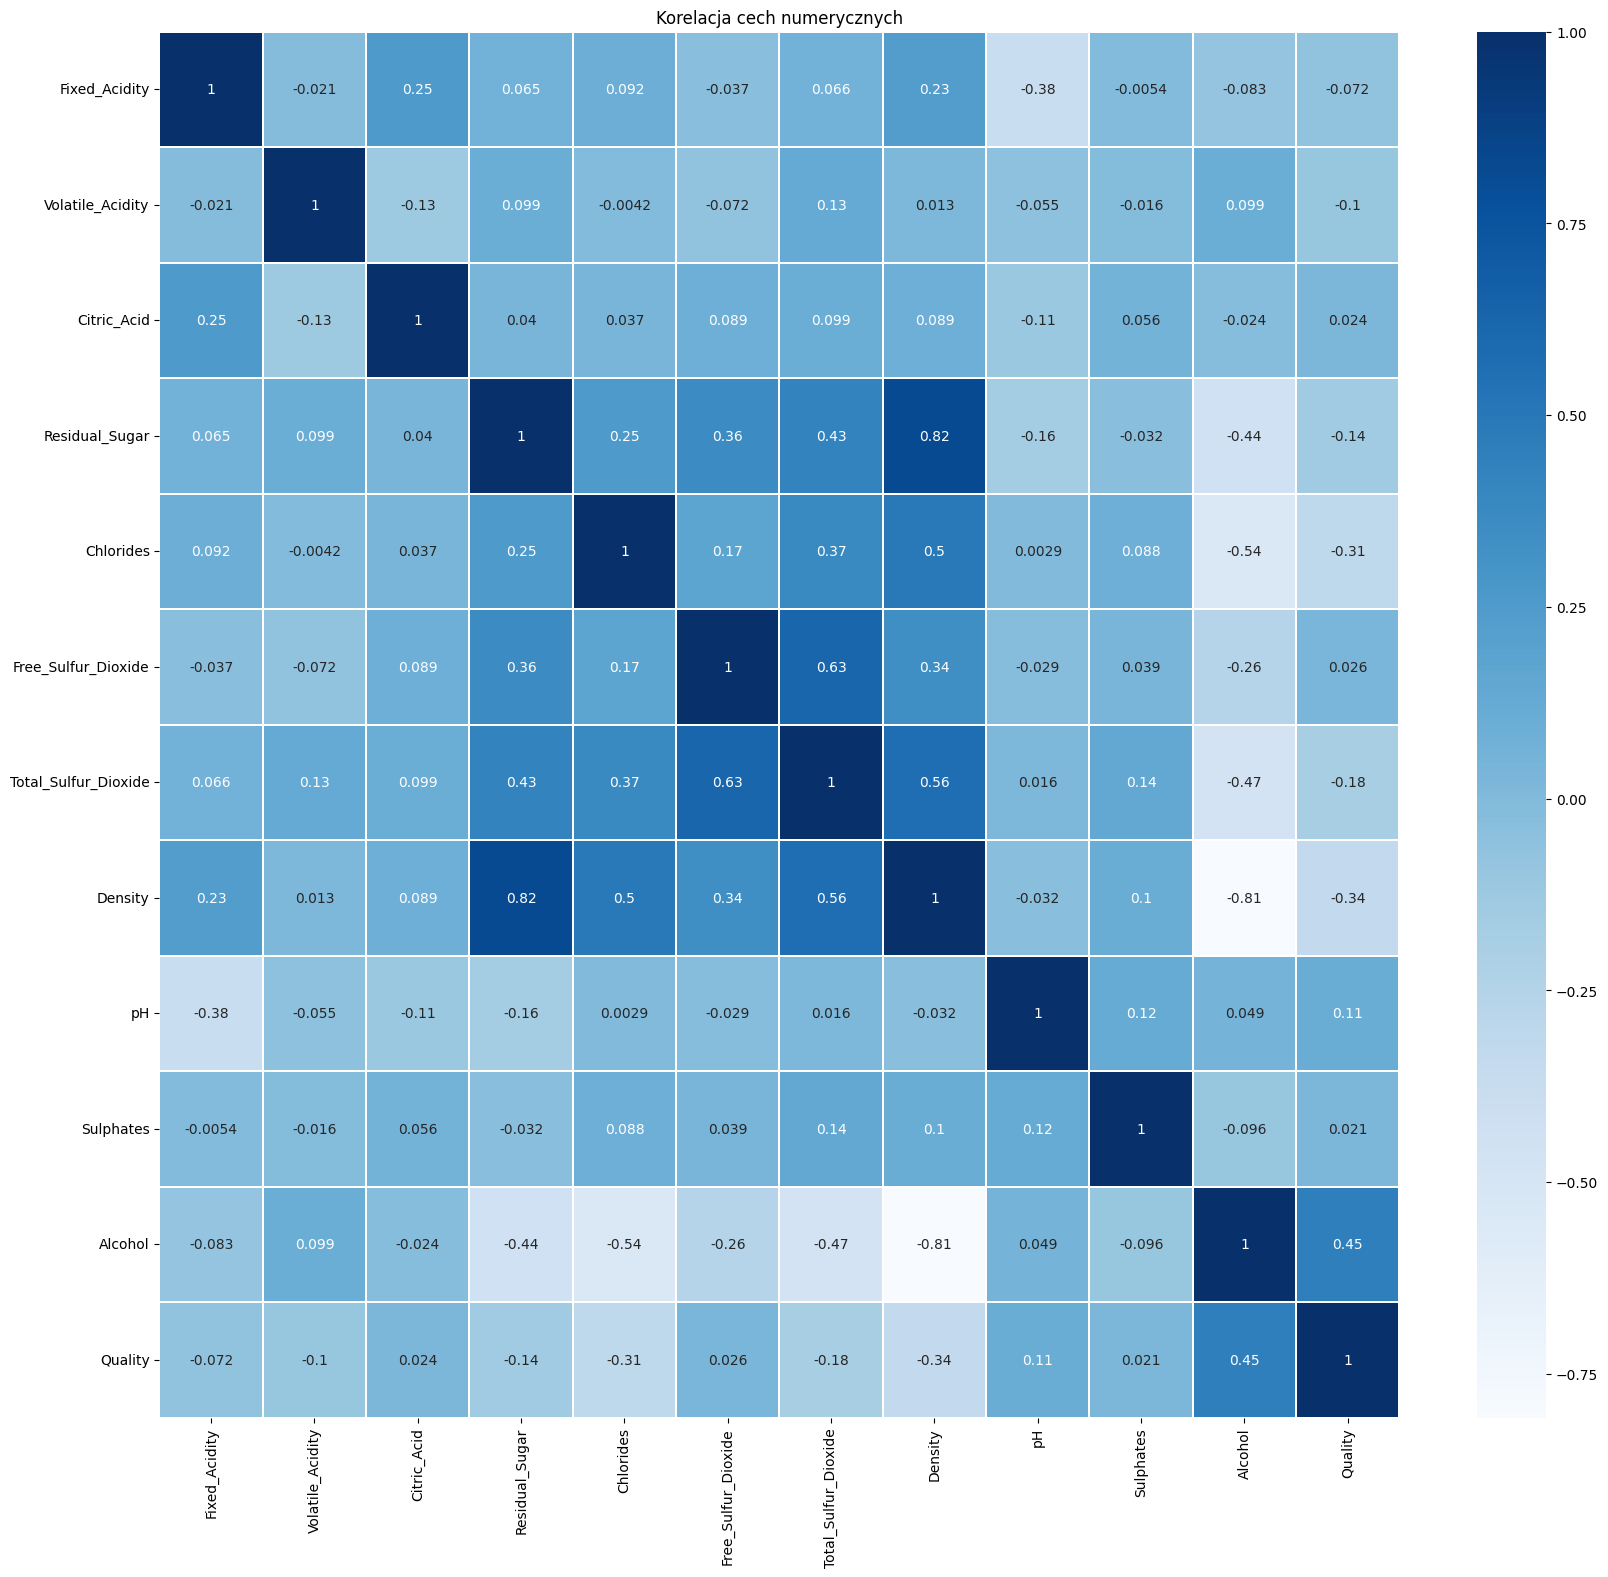

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns



corr_matrix = df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix,annot=True, linewidths = 0.1, cmap="Blues")
plt.title('Korelacja cech numerycznych')
plt.show

Text(0, 0.5, 'Korelacja (%)')

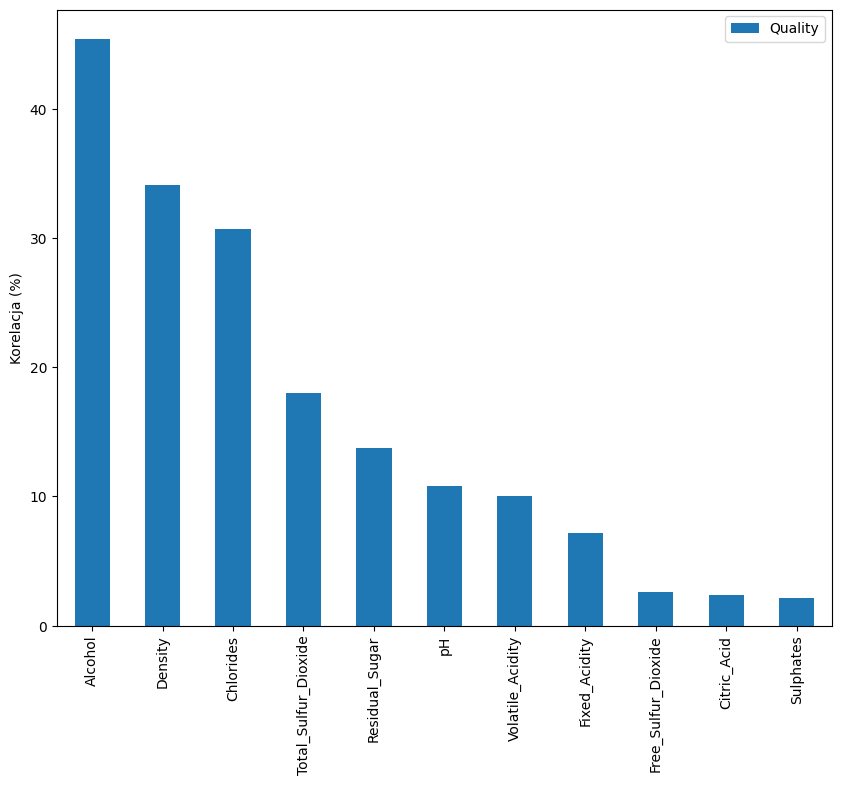

In [57]:
pd.DataFrame(abs(df.corr()['Quality'].drop('Quality')*100).sort_values(
ascending=False)).plot.bar(figsize = (10,8))
plt.ylabel('Korelacja (%)')

In [58]:
#drop najmniejszych korelacji
df_cleaned = df.drop(["Free_Sulfur_Dioxide", "Citric_Acid", "Sulphates"], axis=1)

In [59]:
#standaryzacja/skalowanie MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_float = list(df_cleaned.select_dtypes(include='float').columns)
for i in df_cleaned[col_float]:
  df_cleaned[i] = scaler.fit_transform(df_cleaned[[i]])
df_cleaned.head()

,Fixed_Acidity,Volatile_Acidity,Residual_Sugar,Chlorides,Total_Sulfur_Dioxide,Density,pH,Alcohol,Quality
1,0.375,0.511628,0.052083,0.607143,0.476793,0.472241,0.6375,0.189655,6
2,0.825,0.465116,0.328125,0.625000,0.329114,0.547635,0.5875,0.293103,6
3,0.600,0.348837,0.411458,0.767857,0.704641,0.581905,0.5000,0.258621,6
6,0.350,0.558140,0.333333,0.535714,0.493671,0.533927,0.4875,0.206897,6
9,0.825,0.325581,0.046875,0.517857,0.464135,0.458533,0.5375,0.448276,6


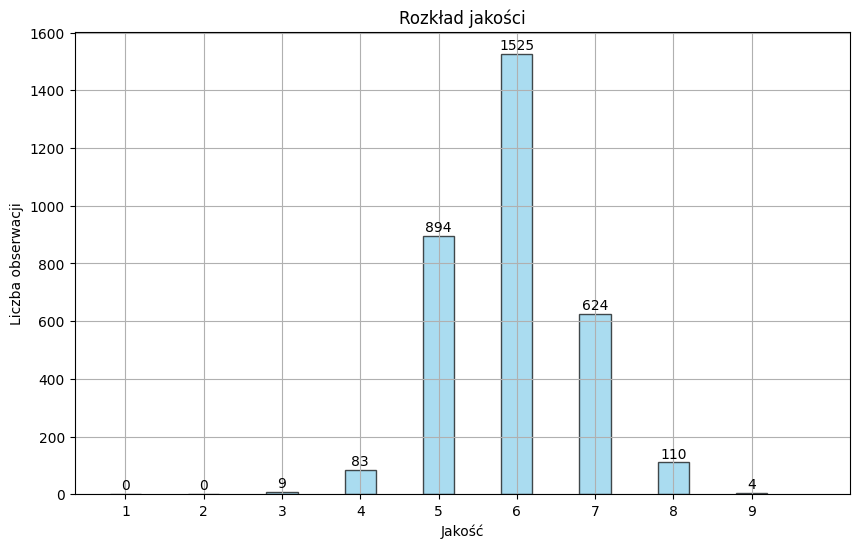

In [60]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

bar_width = 0.4

counts, bins, _ = plt.hist(df_cleaned['Quality'], bins=np.arange(1, 11) - bar_width / 2, width=bar_width,
                           color='skyblue', edgecolor='black', alpha=0.7)

for count, x in zip(counts, bins[:-1]):
    plt.text(x + bar_width / 2, count + 5, int(count), ha='center', va='bottom')

plt.title('Rozkład jakości')
plt.xlabel('Jakość')
plt.ylabel('Liczba obserwacji')

plt.xticks(range(1, 10))

plt.grid(True)
plt.show()


In [61]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Wyodrębnienie cech i etykiet
X = df_cleaned.drop(columns=['Quality'])
y = df_cleaned['Quality']


# Inicjalizacja i dopasowanie OrdinalEncoder
enc = OrdinalEncoder()
X_encoded = enc.fit_transform(X)


# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [62]:
df_cleaned.columns

Index(['Fixed_Acidity', 'Volatile_Acidity', 'Residual_Sugar', 'Chlorides',
       'Total_Sulfur_Dioxide', 'Density', 'pH', 'Alcohol', 'Quality'],
      dtype='object')

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error

# Inicjalizacja i dopasowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred = model.predict(X_test)

print("Średni błąd bezwzględny: ",mean_absolute_error(y_test,y_pred))

print("Mediana błędu bezwzględnego: ",median_absolute_error(y_test,y_pred))

Średni błąd bezwzględny:  0.6177697210215619
Mediana błędu bezwzględnego:  0.5407594153629889


In [64]:
from sklearn.metrics import r2_score
# Obliczenie R^2
r2 = r2_score(y_test, y_pred)
print("Współczynnik determinacji (R^2):", r2) #dopasowanie modelu do danych, im wyższy R^2 tym model bardziej dopasowany, przyjmuje wartości od 0 do 1

Współczynnik determinacji (R^2): 0.17484891669482516


In [65]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Obliczenie Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred) #średnia kwadratów różnic pomiędzy wartościami przewidywanymi przez model, a rzeczywistymi wartościami. Im niższy MSE, tym lepszy model

# Obliczenie Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse) #pierwiastek kwadratowy z MSE, co daje nam średnią wartość błędu w oryginalnych jednostkach danych

Root Mean Squared Error (RMSE): 0.7837250086794045


In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Obliczanie VIF dla każdej z cech
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                feature         VIF
0         Fixed_Acidity   20.539745
1      Volatile_Acidity    7.119512
2        Residual_Sugar   19.263681
3             Chlorides   12.551004
4  Total_Sulfur_Dioxide   13.912456
5               Density  119.355073
6                    pH   20.367442
7               Alcohol   16.667691


In [67]:
from sklearn.linear_model import HuberRegressor

model = HuberRegressor()
model.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred = model.predict(X_test)

print("Średni błąd bezwzględny: ",mean_absolute_error(y_test,y_pred))

print("Mediana błędu bezwzględnego: ",median_absolute_error(y_test,y_pred))

Średni błąd bezwzględny:  0.8045420342403338
Mediana błędu bezwzględnego:  0.6762445719637902


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Dodanie innych algorytmów oraz porównanie ich metryk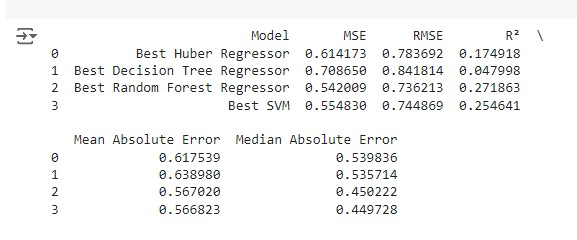

In [68]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Trenowanie modelu regresji drzewa decyzyjnego
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

# Obliczanie miar oceny modelu
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = tree_reg.score(X_test, y_test)
medianAE = metrics.median_absolute_error(y_test, y_pred)
meanAE = metrics.mean_absolute_error(y_test,y_pred)

# Wyświetlanie wyników
print('MSE:', round(MSE, 4))
print('RMSE:', round(RMSE, 4))
print('R²:', round(R2, 4))
print('Mediana błędu bezwzględnego:', round(medianAE, 4))
print('Średni błąd bezwzględny:', round(meanAE, 4))


MSE: 1.0523
RMSE: 1.0258
R²: -0.4137
Mediana błędu bezwzględnego: 1.0
Średni błąd bezwzględny: 0.6923


In [69]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import warnings


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


linreg_model = LinearRegression()
linreg_model.fit(X_train_scaled, y_train)

huber_model = HuberRegressor()
huber_model.fit(X_train_scaled, y_train)

tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)

svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)


linreg_pred = linreg_model.predict(X_test_scaled)
huber_pred = huber_model.predict(X_test_scaled)
tree_pred = tree_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test_scaled)


def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mean_ae = mean_absolute_error(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    return mse, rmse, r2, mean_ae, median_ae


linreg_metrics = calculate_metrics(y_test, linreg_pred)
huber_metrics = calculate_metrics(y_test, huber_pred)
tree_metrics = calculate_metrics(y_test, tree_pred)
rf_metrics = calculate_metrics(y_test, rf_pred)
svm_metrics = calculate_metrics(y_test, svm_pred)

metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Huber Regressor", "Decision Tree Regressor", "Random Forest Regressor", "SVM"],
    "MSE": [linreg_metrics[0], huber_metrics[0], tree_metrics[0], rf_metrics[0], svm_metrics[0]],
    "RMSE": [linreg_metrics[1], huber_metrics[1], tree_metrics[1], rf_metrics[1], svm_metrics[1]],
    "R²": [linreg_metrics[2], huber_metrics[2], tree_metrics[2], rf_metrics[2], svm_metrics[2]],
    "Mean Absolute Error": [linreg_metrics[3], huber_metrics[3], tree_metrics[3], rf_metrics[3], svm_metrics[3]],
    "Median Absolute Error": [linreg_metrics[4], huber_metrics[4], tree_metrics[4], rf_metrics[4], svm_metrics[4]]
})

print(metrics_df)



                     Model       MSE      RMSE        R²  Mean Absolute Error  \
0        Linear Regression  0.614225  0.783725  0.174849             0.617770   
1          Huber Regressor  0.614032  0.783602  0.175108             0.617707   
2  Decision Tree Regressor  1.052308  1.025820 -0.413672             0.692308   
3  Random Forest Regressor  0.548198  0.740404  0.263549             0.568954   
4                      SVM  0.562218  0.749812  0.244715             0.562155   

   Median Absolute Error  
0               0.540759  
1               0.532416  
2               1.000000  
3               0.450000  
4               0.464089  


Hiperparametryzacja modeli

Kod bardzo długo się kompiluje dlatego tutaj porównanie metryk po hiperparametryzacji

                          Model       MSE      RMSE        R²  \
0          Best Huber Regressor  0.614173  0.783692  0.174918   
1  Best Decision Tree Regressor  0.708650  0.841814  0.047998   
2  Best Random Forest Regressor  0.542009  0.736213  0.271863   
3                      Best SVM  0.554830  0.744869  0.254641   

   Mean Absolute Error  Median Absolute Error  
0             0.617539               0.539836  
1             0.638980               0.535714  
2             0.567020               0.450222  
3             0.566823               0.449728  


In [70]:
from sklearn.model_selection import GridSearchCV


huber_params = {
    'epsilon': [1.35, 1.5, 1.75, 2.0],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

tree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svm_params = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 1.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}


huber_grid = GridSearchCV(HuberRegressor(), huber_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=0), tree_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid = GridSearchCV(RandomForestRegressor(random_state=0), rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
svm_grid = GridSearchCV(SVR(), svm_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


huber_grid.fit(X_train_scaled, y_train)
tree_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)
svm_grid.fit(X_train_scaled, y_train)


best_huber = huber_grid.best_estimator_
best_tree = tree_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_svm = svm_grid.best_estimator_


best_huber_pred = best_huber.predict(X_test_scaled)
best_tree_pred = best_tree.predict(X_test)
best_rf_pred = best_rf.predict(X_test)
best_svm_pred = best_svm.predict(X_test_scaled)

best_huber_metrics = calculate_metrics(y_test, best_huber_pred)
best_tree_metrics = calculate_metrics(y_test, best_tree_pred)
best_rf_metrics = calculate_metrics(y_test, best_rf_pred)
best_svm_metrics = calculate_metrics(y_test, best_svm_pred)


best_metrics_df = pd.DataFrame({
    "Model": ["Best Huber Regressor", "Best Decision Tree Regressor", "Best Random Forest Regressor", "Best SVM"],
    "MSE": [best_huber_metrics[0], best_tree_metrics[0], best_rf_metrics[0], best_svm_metrics[0]],
    "RMSE": [best_huber_metrics[1], best_tree_metrics[1], best_rf_metrics[1], best_svm_metrics[1]],
    "R²": [best_huber_metrics[2], best_tree_metrics[2], best_rf_metrics[2], best_svm_metrics[2]],
    "Mean Absolute Error": [best_huber_metrics[3], best_tree_metrics[3], best_rf_metrics[3], best_svm_metrics[3]],
    "Median Absolute Error": [best_huber_metrics[4], best_tree_metrics[4], best_rf_metrics[4], best_svm_metrics[4]]
})

print(best_metrics_df)


                          Model       MSE      RMSE        R²  \
0          Best Huber Regressor  0.614173  0.783692  0.174918   
1  Best Decision Tree Regressor  0.708650  0.841814  0.047998   
2  Best Random Forest Regressor  0.542009  0.736213  0.271863   
3                      Best SVM  0.554830  0.744869  0.254641   

   Mean Absolute Error  Median Absolute Error  
0             0.617539               0.539836  
1             0.638980               0.535714  
2             0.567020               0.450222  
3             0.566823               0.449728  


NAJLEPSZY MODEL TO RANDOM FOREST REGRESSOR, ma największe R^2 i najmniejsze błędy.

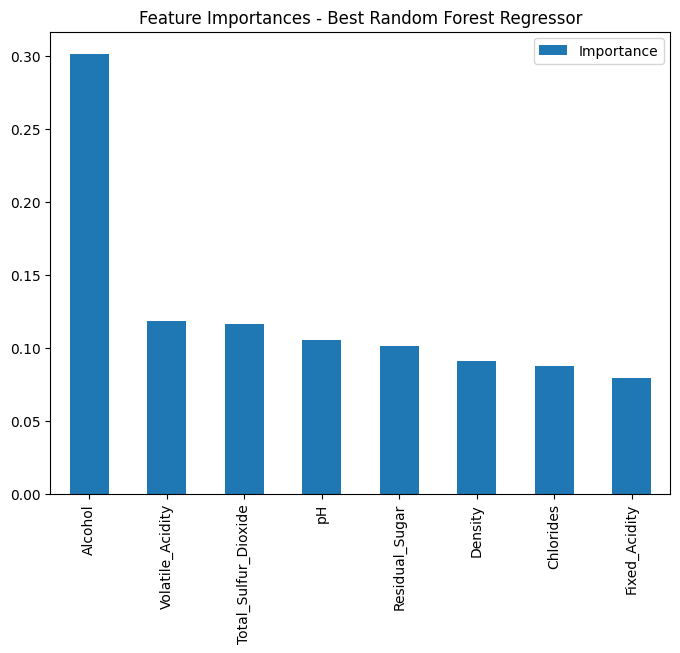

In [72]:

#Explainable AI: interpretacja i zrozumienie modelu uczenia maszynowego

feature_names = X.columns

# Plot feature importances for the best Random Forest model
feat_importances = pd.DataFrame(best_rf.feature_importances_, index=feature_names, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.title("Feature Importances - Best Random Forest Regressor")
plt.show()

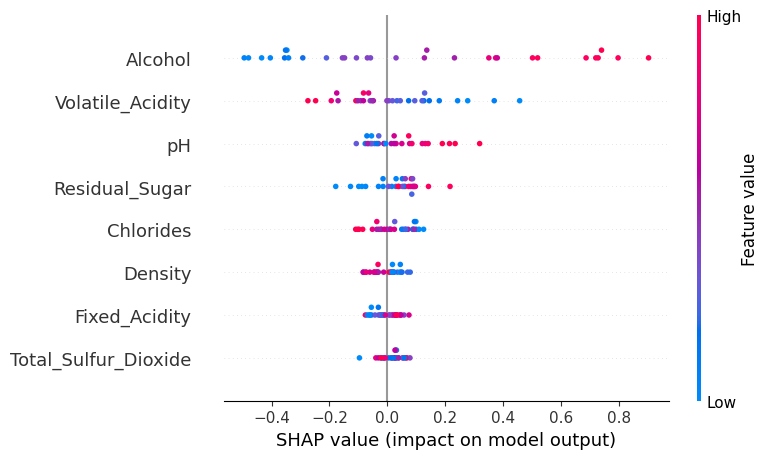

In [79]:
import shap
shap.initjs()
# Create the explainer
explainer = shap.Explainer(best_rf,  feature_names = feature_names)
# Evaluate SHAP values
shap_values = explainer.shap_values(X_test)

 # Check SHAP values for the first 30 instances
shap_values_30 = shap_values[:30]

# Visualize SHAP values for the first 30 instances
shap.summary_plot(shap_values_30, X_test[:30], feature_names=feature_names)

Intercept 5.8805313702973665
Prediction_local [6.05798387]
Right: 5.74093253968254


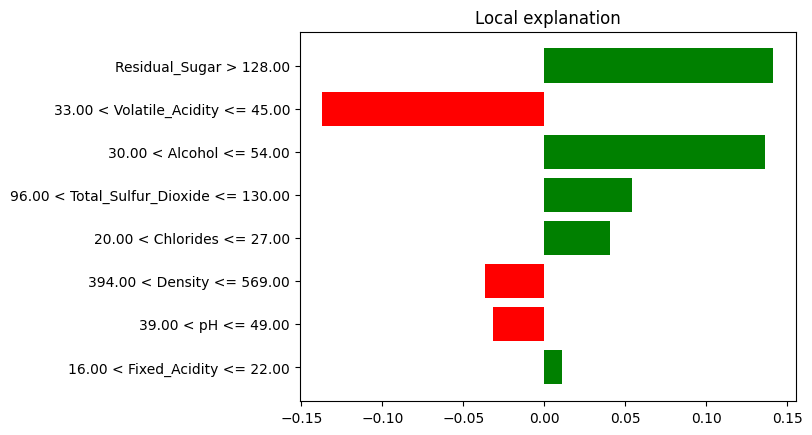

In [83]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Przekonwertowanie X_train z powrotem na DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_df.values,
                                                   feature_names=X_train_df.columns.values.tolist(),
                                                   class_names=['white_wine_quality'],
                                                   verbose=True,
                                                   mode='regression')

# Explain an instance of prediction from the test set (e.g., 5th instance)
exp = explainer.explain_instance(X_test[4], best_rf.predict, num_features=10)

# Plot the explanation as a pyplot figure
exp.as_pyplot_figure()
plt.show()

Variable Importance Plot - Global Interpretation


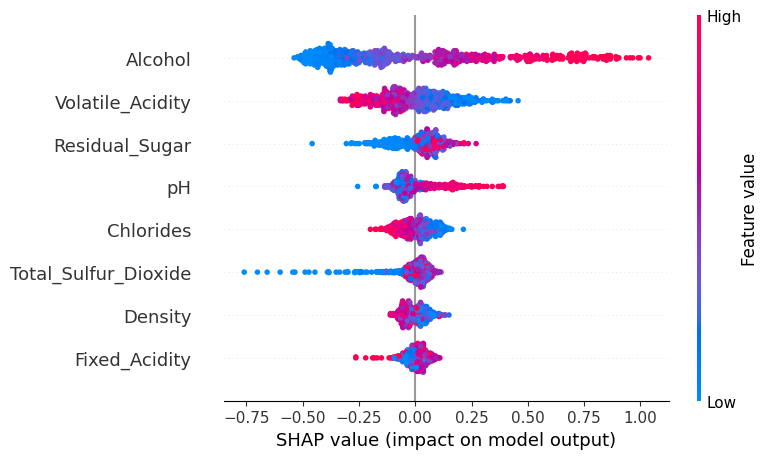

In [85]:
print("Variable Importance Plot - Global Interpretation")
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [ ]:
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

# Mapowanie etykiet na wartości numeryczne (jeśli są w formacie kategorycznym)
class_mapping = {label: i for i, label in enumerate(np.unique(y_train))}
y_train_mapped = np.array([class_mapping[label] for label in y_train])

In [ ]:
def entropy(labels):
    counts = np.bincount(labels)
    probabilities = counts / len(labels)
    probabilities = probabilities[probabilities > 0]
    return -np.sum(probabilities * np.log2(probabilities))

entropy_before_split = entropy(y_train_mapped)
print("Entropia przed podziałem:", entropy_before_split)

# Lista cech
features = ['Fixed_Acidity', 'Volatile_Acidity', 'Residual_Sugar', 'Chlorides',
       'Total_Sulfur_Dioxide', 'Density', 'pH', 'Alcohol']

# Mapowanie indeksów na nazwy cech
feature_indices = {feature: i for i, feature in enumerate(features)}

# Funkcja do obliczania entropii i zysku informacyjnego dla danej cechy i progu
def information_gain_for_feature(X_train, y_train_mapped, feature_index, threshold):
    left_indices = X_train[:, feature_index] <= threshold
    right_indices = ~left_indices
    entropy_left = entropy(y_train_mapped[left_indices])
    entropy_right = entropy(y_train_mapped[right_indices])
    entropy_after_split = (np.sum(left_indices) / len(y_train_mapped)) * entropy_left + \
                          (np.sum(right_indices) / len(y_train_mapped)) * entropy_right
    information_gain = entropy_before_split - entropy_after_split
    return information_gain

# Obliczanie zysku informacyjnego dla każdej cechy z przykładowym progiem
for feature, index in feature_indices.items():
    threshold = np.median(X_train[:, index])  # Przykładowy próg jako mediana
    info_gain = information_gain_for_feature(X_train, y_train_mapped, index, threshold)
    print(f"Zysk informacyjny dla podziału na podstawie {feature} na poziomie {threshold:.2f}: {info_gain:.4f}")


In [ ]:
# Drzewo decyzyjne
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Przekonwertuj unikalne klasy na typ danych str
class_names = [str(cls) for cls in np.unique(y_train)]

# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=features, class_names=class_names, filled=True)
plt.show()

In [ ]:
# Zaimplementuj las losowy złożony z 15 drzew
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Zaimplementuj las losowy złożony z 15 drzew
random_forest = RandomForestClassifier(n_estimators=15)
random_forest.fit(X_train, y_train)

# Przetestuj wydajność na zbiorze testowym
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Dokładność drzewa decyzyjnego:", accuracy_dt)

y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Dokładność lasu losowego:", accuracy_rf)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Parameter grid for Decision Tree
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Parameter grid for Random Forest
forest_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Hyperparameter tuning for Decision Tree
tree_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                param_grid=tree_param_grid,
                                cv=5,
                                scoring='accuracy')
tree_grid_search.fit(X_train, y_train)

# Best parameters and model for Decision Tree
best_tree_params = tree_grid_search.best_params_
best_tree_model = tree_grid_search.best_estimator_

# Predict and evaluate the Decision Tree
y_pred_tree = best_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Best parameters for Decision Tree: {best_tree_params}")
print(f"Accuracy of tuned Decision Tree: {accuracy_tree}")

# Hyperparameter tuning for Random Forest
forest_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                  param_grid=forest_param_grid,
                                  cv=5,
                                  scoring='accuracy')
forest_grid_search.fit(X_train, y_train)

# Best parameters and model for Random Forest
best_forest_params = forest_grid_search.best_params_
best_forest_model = forest_grid_search.best_estimator_

# Predict and evaluate the Random Forest
y_pred_forest = best_forest_model.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Best parameters for Random Forest: {best_forest_params}")
print(f"Accuracy of tuned Random Forest: {accuracy_forest}")

# Comparison table
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Best Parameters': [best_tree_params, best_forest_params],
    'Accuracy': [accuracy_tree, accuracy_forest]
})

# Display the comparison
print(comparison_df)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_tree_model, feature_names=features, class_names=class_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()
